# Data Visualization

### Import movie data

In [69]:
import numpy as np
import pandas as pd

i_cols = ['Movie Id', 'Movie Title' ,'Unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

movies = pd.read_csv('movies.txt', sep='\t', names=i_cols,
 encoding='utf-8')

print(movies.shape)
movies = np.asarray(movies)
print(movies[0])

(1682, 21)
[1 'Toy Story (1995)' 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Import ratings data

In [70]:
import numpy as np
import pandas as pd

i_cols = ['User Id', 'Movie ID' ,'Rating']

ratings = pd.read_csv('data.txt', sep='\t', names=i_cols,
 encoding='utf-8')

print(ratings.shape)
ratings = np.asarray(ratings)
print(ratings[0])

(100000, 3)
[196 242   3]


### Visualizations 1

[6110, 11370, 27145, 34174, 21201]
3.52986


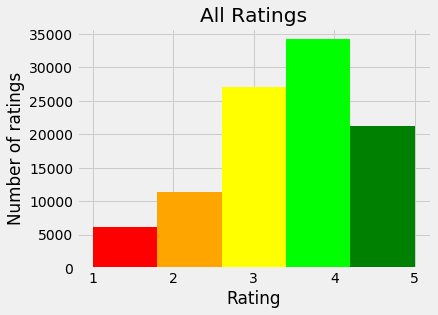

In [104]:
import random
import pandas as pd

import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
_, ax1 = plt.subplots()
N, bins, patches = ax1.hist(ratings[:,2], 5)
# patches[0].set_facecolor('FF0000')
# patches[1].set_facecolor('ff6600')
# patches[2].set_facecolor('FFFF00')
# patches[3].set_facecolor('66ff00')
# patches[4].set_facecolor('00FF00')
patches[0].set_facecolor('red')
patches[1].set_facecolor('orange')
patches[2].set_facecolor('yellow')
patches[3].set_facecolor('lime')
patches[4].set_facecolor('green')

plt.tight_layout()
plt.title("All Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of ratings")
plt.show()
plt.savefig("all_movie_ratings.png")

sums = [0,0,0,0,0]
for i in ratings[:,2]:
    sums[i-1] += 1
print(sums)
print(np.average(ratings[:,2]))

## 10 most popular ratings

[1879  196  418 1077 1775 1397]
4863
[0.386387   0.04030434 0.08595517 0.22146823 0.36500103 0.28727123]


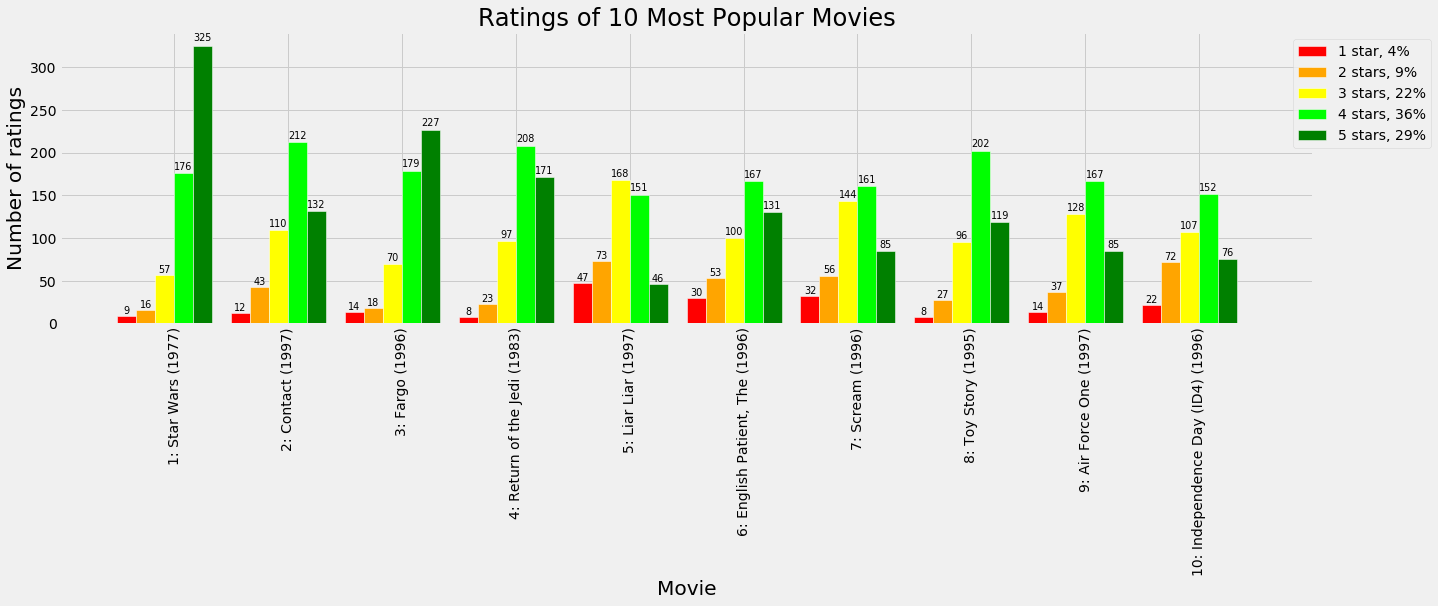

In [95]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
from collections import Counter

movie_ids = ratings[:,1]
counter = Counter(movie_ids)
# top_ten has format: id, # of 1s, # of 2s, # of 3s, # of 4s, # of 5s
top_ten = []
for i in counter.most_common(10):
    top_ten.append([i[0], 0, 0, 0, 0, 0])
top_ten=np.asarray(top_ten)
for i in range(100000):
    if ratings[i][1] in top_ten[:,0]:
        id_row = np.where(top_ten[:,0] == ratings[i][1])[0]
        rating = ratings[i][2]
        top_ten[id_row,rating] += 1

plt.figure(figsize=(20,5))
# y-axis in bold
#rc('font', weight='bold')

# Values of each group
bars1 = top_ten[:,1].tolist()
bars2 = top_ten[:,2].tolist()
bars3 = top_ten[:,3].tolist()
bars4 = top_ten[:,4].tolist()
bars5 = top_ten[:,5].tolist()
bars6 = np.zeros(10).tolist()
# The position of the bars on the x-axis
r = [0,1,2,3,4,5,6,7,8,9]
barWidth = 10
r=[barWidth*x for x in r]
 
# Names of movies
names = [str(i+1)+": "+movies[np.where(movies[:,0]==top_ten[i, 0])[0],1][0] for i in range(10)]


# 1 star bars
rating1=plt.bar([6*x for x in r],
        bars1, 
        color='red', 
        edgecolor='white', 
        width=barWidth)
# 2 star bars
rating2=plt.bar([6*x+1*barWidth for x in r], bars2, 
        color='orange', 
        edgecolor='white', 
        width=barWidth)
# 3 star bars
rating3=plt.bar([6*x+2*barWidth for x in r], bars3, 
        color='yellow', 
        edgecolor='white', 
        width=barWidth)
# 4 star bars
rating4=plt.bar([6*x+3*barWidth for x in r], bars4, 
        color='lime', 
        edgecolor='white', 
        width=barWidth)
# 5 star bars
rating5=plt.bar([6*x+4*barWidth for x in r], bars5, 
        color='green', 
        edgecolor='white', 
        width=barWidth)
# Blank bars
blank=plt.bar([6*x+5*barWidth for x in r], bars6, 
        color='white', 
        edgecolor='white', 
        width=barWidth)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 
                 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom',
                fontsize="x-small")

autolabel(rating1)
autolabel(rating2)
autolabel(rating3)
autolabel(rating4)
autolabel(rating5)

# Custom X axis
plt.xticks([6*x+2.5*barWidth for x in r], names,rotation='vertical')
plt.xlabel("Movie", fontsize="x-large")
plt.ylabel("Number of ratings", fontsize="x-large")
plt.title("Ratings of 10 Most Popular Movies", fontsize="xx-large")
plt.legend((rating1[0],rating2[0],rating3[0],rating4[0],rating5[0]),
           ("1 star, 4%", "2 stars, 9%", "3 stars, 22%", "4 stars, 36%", "5 stars, 29%"),
           bbox_to_anchor=(1.1, 1))
 
# Show and save graphic
plt.show()
plt.savefig("popular_movie_ratings.png")

sums = np.sum(top_ten, axis = 0)
print(sums)
total = np.sum(sums[1:])
print(total)
pcnt = sums/total
print (pcnt)

## 10 highest ratings

[2399.   22.   40.  214.  717. 1312.]
2305.0
[1.04078091 0.00954447 0.01735358 0.09284165 0.31106291 0.5691974 ]


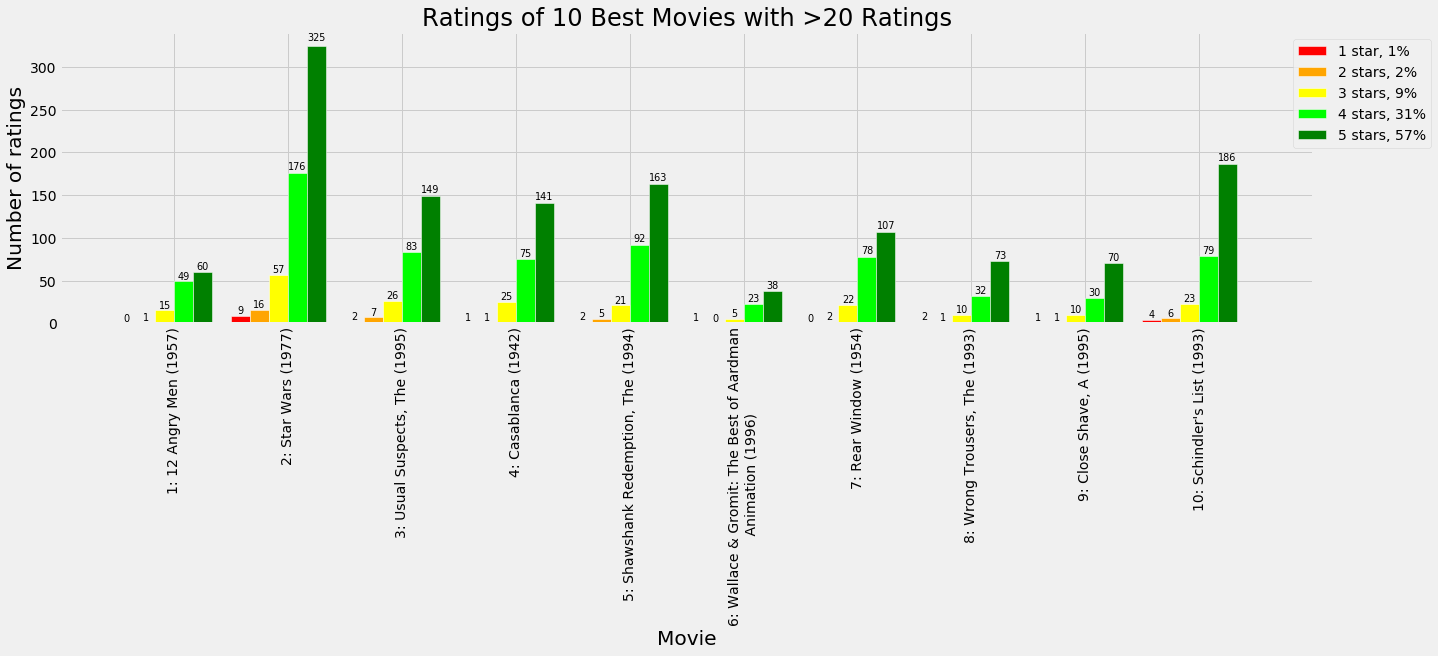

In [93]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

sums = []
for i in range(len(movies)):
    sums.append([movies[i][0], 0, 0])
for i in range (100000):
    sums[[row[0] for row in sums].index(ratings[i][1])][1]+=ratings[i][2]
    sums[[row[0] for row in sums].index(ratings[i][1])][2]+=1
sums = [row for row in sums if row[2]>20]
avgs = [[sums[i][0], sums[i][1]/sums[i][2]] for i in range(len(sums))]
avgs = np.array(avgs)
top_ten_ind = np.argpartition(avgs[:,1], -10)[-10:]

movie_ids = ratings[:,1]
# top_ten has format: id, # of 1s, # of 2s, # of 3s, # of 4s, # of 5s
top_ten = []
for i in avgs[top_ten_ind]:
    top_ten.append([i[0], 0, 0, 0, 0, 0])
top_ten=np.asarray(top_ten)
for i in range(100000):
    if ratings[i][1] in top_ten[:,0]:
        id_row = np.where(top_ten[:,0] == ratings[i][1])[0]
        rating = ratings[i][2]
        top_ten[id_row,rating] += 1

plt.figure(figsize=(20,5))
# y-axis in bold
#rc('font', weight='bold')

# Values of each group
bars1 = top_ten[:,1].tolist()
bars2 = top_ten[:,2].tolist()
bars3 = top_ten[:,3].tolist()
bars4 = top_ten[:,4].tolist()
bars5 = top_ten[:,5].tolist()
bars6 = np.zeros(10).tolist()
# The position of the bars on the x-axis
r = [0,1,2,3,4,5,6,7,8,9]
barWidth = 10
r=[barWidth*x for x in r]
 
# Names of movies
names = []
for i in range(10):
    name = str(i+1)+": "+movies[np.where(movies[:,0]==top_ten[i, 0])[0],1][0]
    if len(name) > 50:
        name = name[:40] + '\n' + name[40:]
    names.append(name)

# 1 star bars
rating1=plt.bar([6*x for x in r],
        bars1, 
        color='red', 
        edgecolor='white', 
        width=barWidth)
# 2 star bars
rating2=plt.bar([6*x+1*barWidth for x in r], bars2, 
        color='orange', 
        edgecolor='white', 
        width=barWidth)
# 3 star bars
rating3=plt.bar([6*x+2*barWidth for x in r], bars3, 
        color='yellow', 
        edgecolor='white', 
        width=barWidth)
# 4 star bars
rating4=plt.bar([6*x+3*barWidth for x in r], bars4, 
        color='lime', 
        edgecolor='white', 
        width=barWidth)
# 5 star bars
rating5=plt.bar([6*x+4*barWidth for x in r], bars5, 
        color='green', 
        edgecolor='white', 
        width=barWidth)
# Blank bars
blank=plt.bar([6*x+5*barWidth for x in r], bars6, 
        color='white', 
        edgecolor='white', 
        width=barWidth)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 
                 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom',
                fontsize="x-small")

autolabel(rating1)
autolabel(rating2)
autolabel(rating3)
autolabel(rating4)
autolabel(rating5)

# Custom X axis
plt.xticks([6*x+2.5*barWidth for x in r], names,rotation='vertical')
plt.xlabel("Movie", fontsize="x-large")
plt.ylabel("Number of ratings", fontsize="x-large")
plt.title("Ratings of 10 Best Movies with >20 Ratings", fontsize="xx-large")
plt.legend((rating1[0],rating2[0],rating3[0],rating4[0],rating5[0]),
           ("1 star, 1%", "2 stars, 2%", "3 stars, 9%", "4 stars, 31%", "5 stars, 57%"),
           bbox_to_anchor=(1.1, 1))
 
# Show and save graphic
plt.show()
plt.savefig("best_movie_ratings.png")
sums = np.sum(top_ten, axis = 0)
print(sums)
total = np.sum(sums[1:])
print(total)
pcnt = sums/total
print (pcnt)

## ratings from genres of choice

#### Action

[  153  2988  6384 14277 17284 11430]
52363
[0.00292191 0.05706319 0.12191815 0.27265436 0.3300804  0.2182839 ]


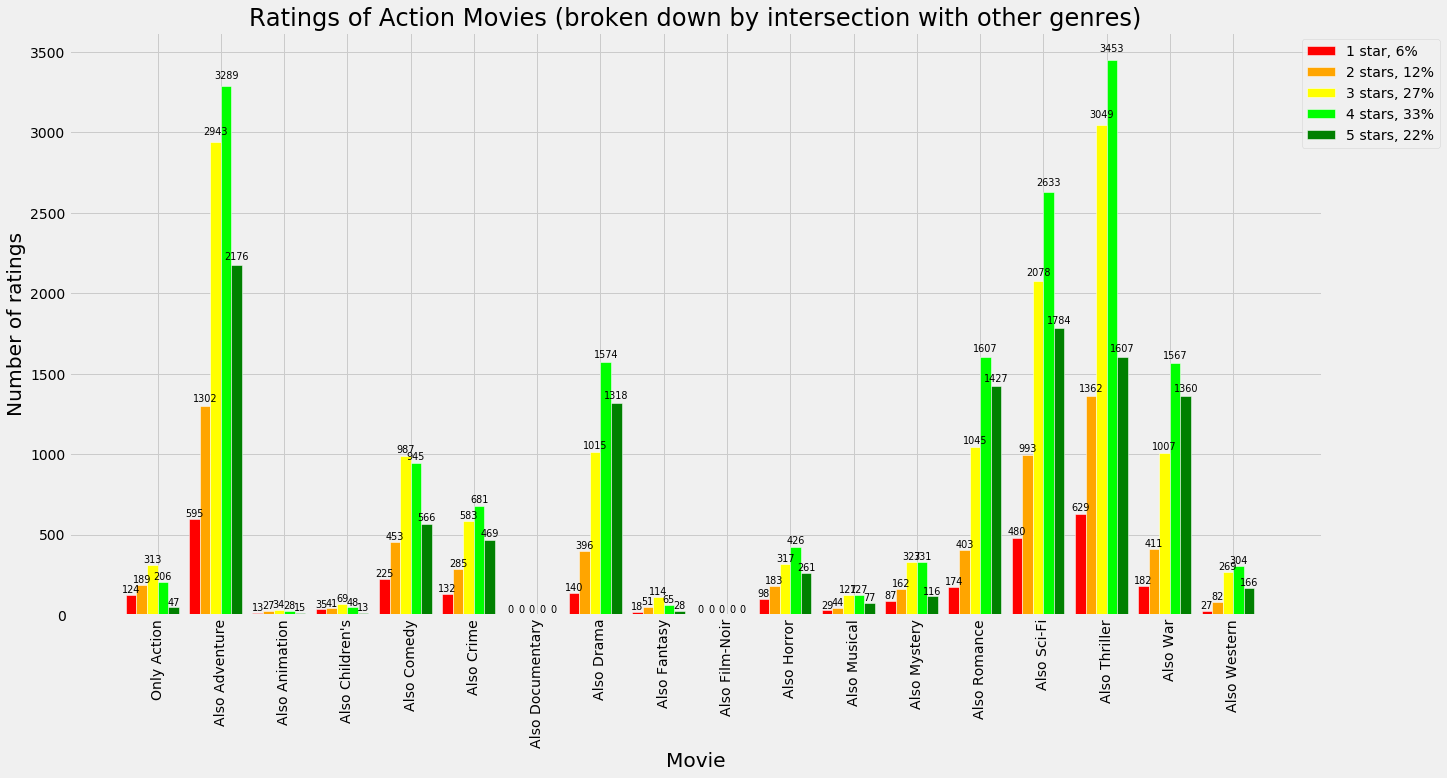

In [96]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
num_genres = 18

action_movies = []
for i in range(len(movies)):
    if movies[i][3] == 1:
        action_movies.append(movies[i])
action_movies = np.asarray(action_movies)
movie_ids = ratings[:,1]

# eighteen has format: genre, # of 1s, # of 2s, # of 3s, # of 4s, # of 5s
# 0: nothing, 1:'Adventure', 2:'Animation', 3:'Children\'s', 
# 4:'Comedy', 5:'Crime', 6:'Documentary', 7:'Drama', 8:'Fantasy',
# 9:'Film-Noir', 10:'Horror', 11:'Musical', 12:'Mystery', 
# 13:'Romance', 14:'Sci-Fi', 15:'Thriller', 16:'War', 17:'Western'

# rating: user_id, movie_id, rating
eighteen = []
for i in range(18):
    eighteen.append([i, 0, 0, 0, 0, 0])
for rating in ratings:
    if (rating[1] in action_movies[:,0]):
        index_of_movie_id = action_movies[:,0].tolist().index(rating[1])
        # adventure
        has_other_genre = False
        for i in range (1, 18):
            if action_movies[index_of_movie_id][i+3] == 1:
                eighteen[i][rating[2]] += 1
                has_other_genre = True
        if has_other_genre == False:
            eighteen[0][rating[2]] += 1
eighteen = np.array(eighteen)
#print(eighteen)

plt.figure(figsize=(20,10))
# y-axis in bold
#rc('font', weight='bold')

# Values of each group
bars1 = eighteen[:,1].tolist()
bars2 = eighteen[:,2].tolist()
bars3 = eighteen[:,3].tolist()
bars4 = eighteen[:,4].tolist()
bars5 = eighteen[:,5].tolist()
bars6 = np.zeros(num_genres).tolist()
# The position of the bars on the x-axis
r = np.arange(num_genres)
barWidth = 10
r=[barWidth*x for x in r]
#print(r)
 
# Names of genres
names = ["Only Action", 'Also Adventure', 'Also Animation', 'Also Children\'s', 
        'Also Comedy', 'Also Crime', 'Also Documentary', 'Also Drama', 'Also Fantasy',
        'Also Film-Noir', 'Also Horror', 'Also Musical', 'Also Mystery', 
        'Also Romance', 'Also Sci-Fi', 'Also Thriller', 'Also War', 'Also Western']
#[str(i+1)+": "+movies[np.where(movies[:,0]==top_ten[i, 0])[0],1][0] for i in range(num_genres)]


# 1 star bars
rating1=plt.bar([6*x for x in r],
        bars1, 
        color='red', 
        edgecolor='white', 
        width=barWidth)
# 2 star bars
rating2=plt.bar([6*x+1*barWidth for x in r], bars2, 
        color='orange', 
        edgecolor='white', 
        width=barWidth)
# 3 star bars
rating3=plt.bar([6*x+2*barWidth for x in r], bars3, 
        color='yellow', 
        edgecolor='white', 
        width=barWidth)
# 4 star bars
rating4=plt.bar([6*x+3*barWidth for x in r], bars4, 
        color='lime', 
        edgecolor='white', 
        width=barWidth)
# 5 star bars
rating5=plt.bar([6*x+4*barWidth for x in r], bars5, 
        color='green', 
        edgecolor='white', 
        width=barWidth)
# Blank bars
blank=plt.bar([6*x+5*barWidth for x in r], bars6, 
        color='white', 
        edgecolor='white', 
        width=barWidth)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 
                 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom',
                fontsize="x-small")

autolabel(rating1)
autolabel(rating2)
autolabel(rating3)
autolabel(rating4)
autolabel(rating5)

# Custom X axis
plt.xticks([6*x+2.5*barWidth for x in r], names,rotation='vertical')
plt.xlabel("Movie", fontsize="x-large")
plt.ylabel("Number of ratings", fontsize="x-large")
plt.title("Ratings of Action Movies (broken down by intersection with other genres)", fontsize="xx-large")
plt.legend((rating1[0],rating2[0],rating3[0],rating4[0],rating5[0]),
           ("1 star, 6%", "2 stars, 12%", "3 stars, 27%", "4 stars, 33%", "5 stars, 22%"),
           bbox_to_anchor=(1.1, 1))
 
# Show and save graphic
plt.show()
plt.savefig("action_movie_ratings.png")

sums = np.sum(eighteen, axis = 0)
print(sums)
total = np.sum(sums[1:])
print(total)
pcnt = sums/total
print (pcnt)

### Sci-fi

[ 153 1587 3257 7213 9585 7102]
28744
[0.00532285 0.05521152 0.1133106  0.25093933 0.3334609  0.24707765]


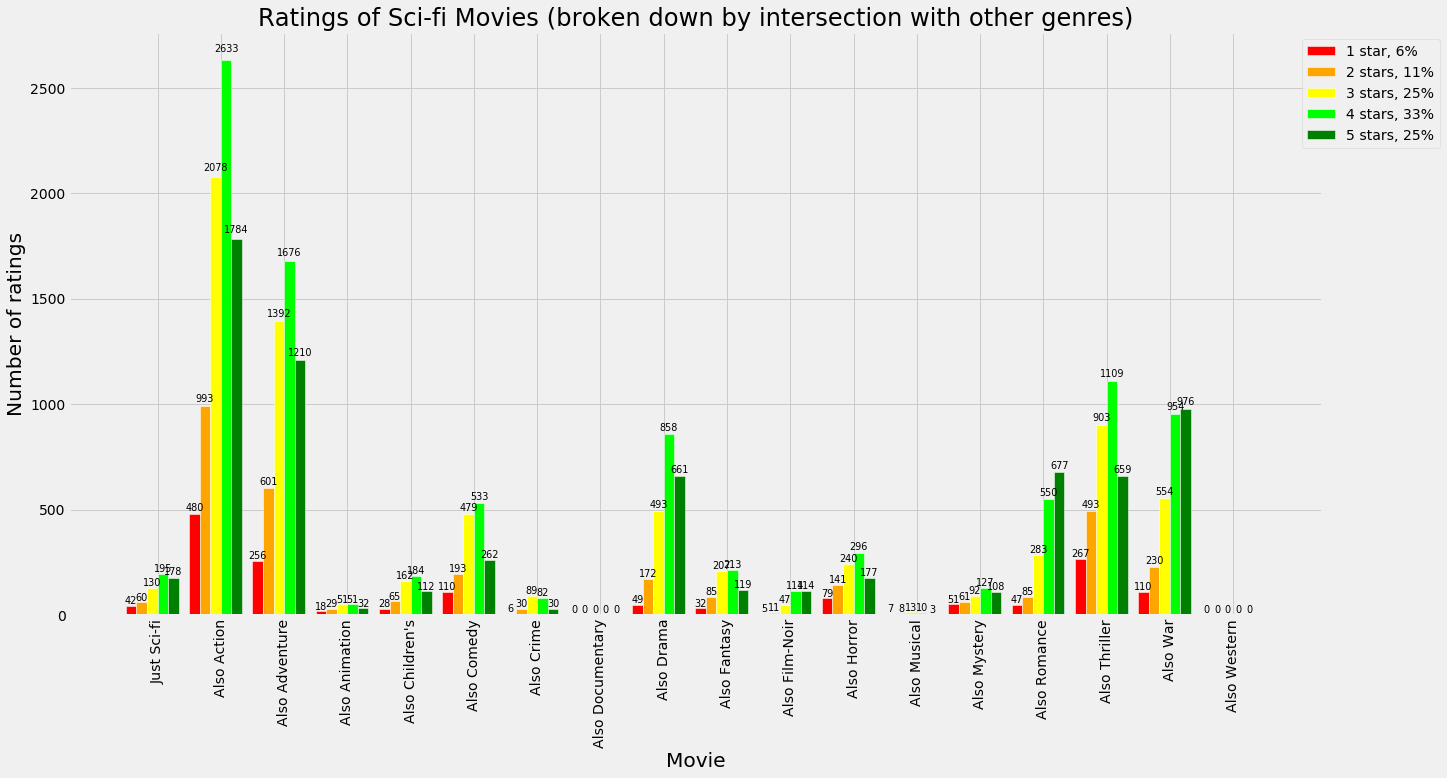

In [98]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
num_genres = 18

scifi_movies = []
for i in range(len(movies)):
    if movies[i][17] == 1:
        scifi_movies.append(movies[i])
scifi_movies = np.asarray(scifi_movies)
movie_ids = ratings[:,1]
# eighteen has format: genre, # of 1s, # of 2s, # of 3s, # of 4s, # of 5s
# 0: nothing, 1:'Action', 2:'Adventure', 3:'Animation', 4:'Children\'s', 
# 5:'Comedy', 6:'Crime', 7:'Documentary', 8:'Drama', 9:'Fantasy',
# 10:'Film-Noir', 11:'Horror', 12:'Musical', 13:'Mystery', 
# 14:'Romance', 15:'Sci-Fi', 16:'Thriller', 17:'War', 18:'Western'

# rating: user_id, movie_id, rating
eighteen = []
for i in range(18):
    eighteen.append([i, 0, 0, 0, 0, 0])
for rating in ratings:
    if (rating[1] in scifi_movies[:,0]):
        index_of_movie_id = scifi_movies[:,0].tolist().index(rating[1])
        has_other_genre = False
        for i in range(1, 15):
            if scifi_movies[index_of_movie_id][i+2] == 1:
                eighteen[i][rating[2]] += 1
                has_other_genre = True
        for i in range(15, 18):
            if scifi_movies[index_of_movie_id][i+3] == 1:
                eighteen[i][rating[2]] += 1
                has_other_genre = True

        # only animation
        if has_other_genre == False:
            eighteen[0][rating[2]] += 1
eighteen = np.array(eighteen)
#print(eighteen)

plt.figure(figsize=(20,10))
# y-axis in bold
#rc('font', weight='bold')

# Values of each group
bars1 = eighteen[:,1].tolist()
bars2 = eighteen[:,2].tolist()
bars3 = eighteen[:,3].tolist()
bars4 = eighteen[:,4].tolist()
bars5 = eighteen[:,5].tolist()
bars6 = np.zeros(num_genres).tolist()
# The position of the bars on the x-axis
r = np.arange(num_genres)
barWidth = 10
r=[barWidth*x for x in r]
#print(r)
 
# Names of genres
names = ["Just Sci-fi", 'Also Action', 'Also Adventure','Also Animation',
         'Also Children\'s', 'Also Comedy', 'Also Crime','Also Documentary', 
         'Also Drama', 'Also Fantasy', 'Also Film-Noir', 'Also Horror', 'Also Musical', 
         'Also Mystery', 'Also Romance', 'Also Thriller', 'Also War', 'Also Western']
#[str(i+1)+": "+movies[np.where(movies[:,0]==top_ten[i, 0])[0],1][0] for i in range(num_genres)]


# 1 star bars
rating1=plt.bar([6*x for x in r],
        bars1, 
        color='red', 
        edgecolor='white', 
        width=barWidth)
# 2 star bars
rating2=plt.bar([6*x+1*barWidth for x in r], bars2, 
        color='orange', 
        edgecolor='white', 
        width=barWidth)
# 3 star bars
rating3=plt.bar([6*x+2*barWidth for x in r], bars3, 
        color='yellow', 
        edgecolor='white', 
        width=barWidth)
# 4 star bars
rating4=plt.bar([6*x+3*barWidth for x in r], bars4, 
        color='lime', 
        edgecolor='white', 
        width=barWidth)
# 5 star bars
rating5=plt.bar([6*x+4*barWidth for x in r], bars5, 
        color='green', 
        edgecolor='white', 
        width=barWidth)
# Blank bars
blank=plt.bar([6*x+5*barWidth for x in r], bars6, 
        color='white', 
        edgecolor='white', 
        width=barWidth)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 
                 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom',
                fontsize="x-small")

autolabel(rating1)
autolabel(rating2)
autolabel(rating3)
autolabel(rating4)
autolabel(rating5)

# Custom X axis
plt.xticks([6*x+2.5*barWidth for x in r], names,rotation='vertical')
plt.xlabel("Movie", fontsize="x-large")
plt.ylabel("Number of ratings", fontsize="x-large")
plt.title("Ratings of Sci-fi Movies (broken down by intersection with other genres)", fontsize="xx-large")
plt.legend((rating1[0],rating2[0],rating3[0],rating4[0],rating5[0]),
           ("1 star, 6%", "2 stars, 11%", "3 stars, 25%", "4 stars, 33%", "5 stars, 25%"),
           bbox_to_anchor=(1.1, 1))
 
# Show and save graphic
plt.show()
plt.savefig("scifi_movie_ratings.png")
sums = np.sum(eighteen, axis = 0)
print(sums)
total = np.sum(sums[1:])
print(total)
pcnt = sums/total
print (pcnt)

[59, 58, 164, 268, 209]


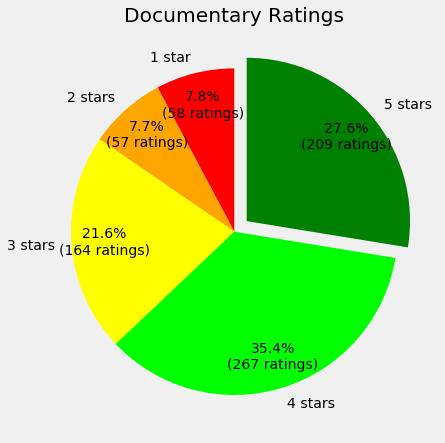

In [77]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
num_genres = 18

plt.figure(figsize = (7,7))
documentary_movies = []
for i in range(len(movies)):
    if movies[i][9] == 1:
        documentary_movies.append(movies[i])
documentary_movies = np.asarray(documentary_movies)

doc_ratings = [0, 0, 0, 0, 0]
doc_movie_ids = documentary_movies[:,0]
for rating in ratings:
    if (rating[1] in doc_movie_ids):
        doc_ratings[rating[2]-1] += 1
print(doc_ratings)
num_ratings = sum(doc_ratings)

labels = '1 star', '2 stars', '3 stars', '4 stars', '5 stars'
colors = ["red", "orange", "yellow", "lime", "green"]
percentages = [str(r/num_ratings) for r in doc_ratings]
explode = (0, 0, 0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} ratings)".format(pct, absolute)

wedges, texts, autotexts = plt.pie(doc_ratings, autopct=lambda pct: func(pct, doc_ratings),
                                  explode = explode, labels = labels, startangle = 90,
                                  colors = colors, pctdistance=0.8)

#plt.pie(doc_ratings, autopct=percentages, shadow = True, startangle = 90)

plt.title("Documentary Ratings")

plt.show()
plt.savefig("documentary_ratings.png")

## Extra Visualizations (IGNORE)

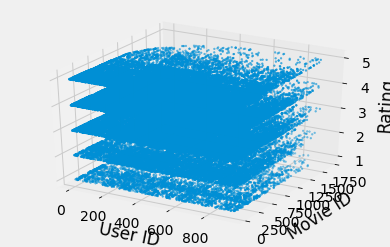

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(xs, ys, zs, c=c, marker=m)
ax.scatter(ratings[:,0], ratings[:,1], ratings[:,2], s=3)
ax.set_xlabel("User ID")
ax.set_ylabel("Movie ID")
ax.set_zlabel("Rating")
plt.show()
plt.savefig("ratings.png")


#### Documentary

[[  0  49  49 139 225 185]
 [  1   0   0   0   0   0]
 [  2   0   0   0   0   0]
 [  3   0   0   0   0   0]
 [  4   0   0   0   0   0]
 [  5   0   0   1   0   0]
 [  6   0   0   0   0   0]
 [  7   3   3  15  27   9]
 [  8   0   0   0   0   0]
 [  9   0   0   0   0   0]
 [ 10   0   0   0   0   0]
 [ 11   0   0   0   0   0]
 [ 12   0   0   0   0   0]
 [ 13   0   0   0   0   0]
 [ 14   0   0   0   0   0]
 [ 15   0   0   0   0   0]
 [ 16   7   6   9  16  15]
 [ 17   0   0   0   0   0]]
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170]
[153  59  58 164 268 209]
758
[0.20184697 0.07783641 0.07651715 0.21635884 0.35356201 0.27572559]


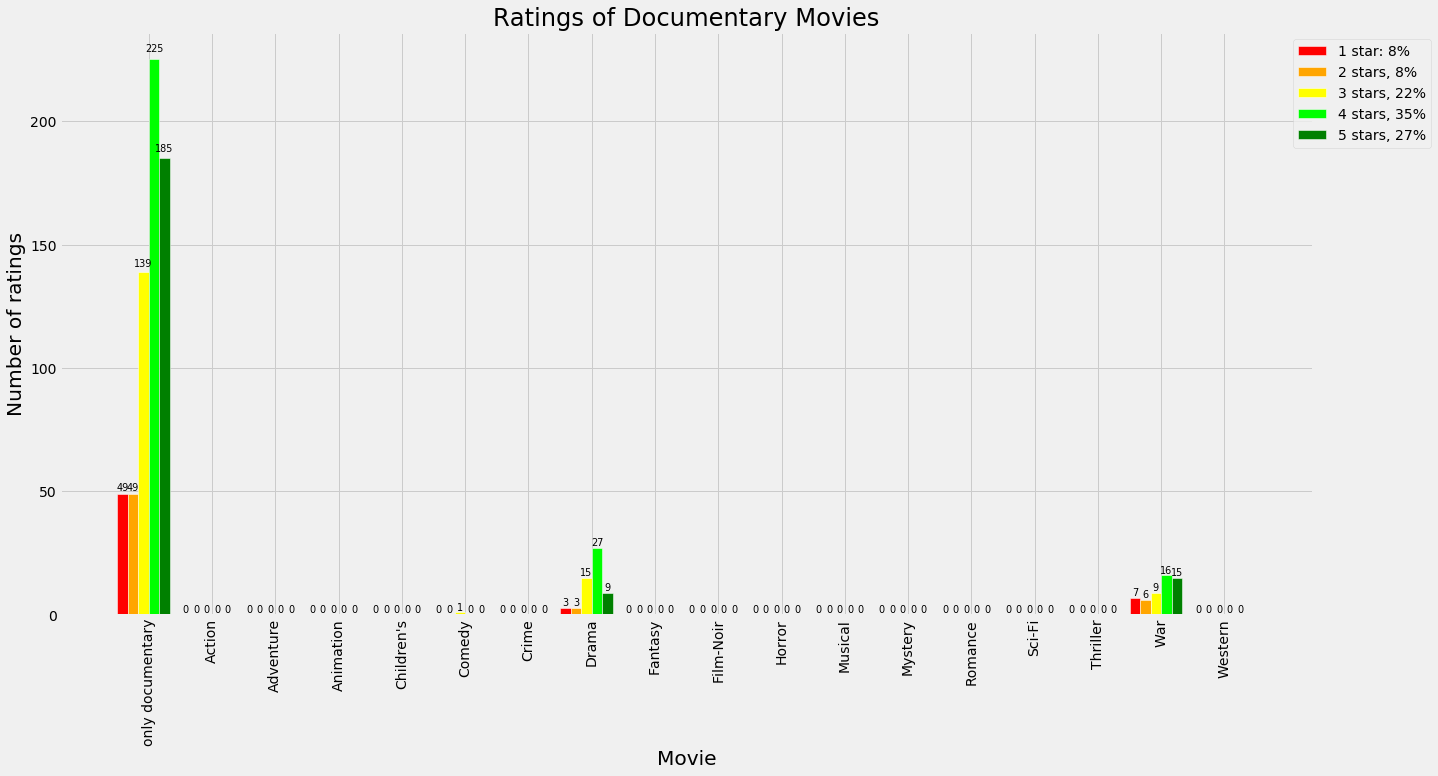

In [85]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
num_genres = 18

documentary_movies = []
for i in range(len(movies)):
    if movies[i][9] == 1:
        documentary_movies.append(movies[i])
documentary_movies = np.asarray(documentary_movies)
movie_ids = ratings[:,1]
# eighteen has format: genre, # of 1s, # of 2s, # of 3s, # of 4s, # of 5s
# 0: nothing, 1:'Action', 2:'Adventure', 3:'Animation', 4:'Children\'s', 
# 5:'Comedy', 6:'Crime', 7:'Documentary', 8:'Drama', 9:'Fantasy',
# 10:'Film-Noir', 11:'Horror', 12:'Musical', 13:'Mystery', 
# 14:'Romance', 15:'Sci-Fi', 16:'Thriller', 17:'War', 18:'Western'

# rating: user_id, movie_id, rating
eighteen = []
for i in range(18):
    eighteen.append([i, 0, 0, 0, 0, 0])
for rating in ratings:
    if (rating[1] in documentary_movies[:,0]):
        index_of_movie_id = documentary_movies[:,0].tolist().index(rating[1])
        has_other_genre = False
        for i in range(1, 7):
            if documentary_movies[index_of_movie_id][i+2] == 1:
                eighteen[i][rating[2]] += 1
                has_other_genre = True
        for i in range(7, 18):
            if documentary_movies[index_of_movie_id][i+3] == 1:
                eighteen[i][rating[2]] += 1
                has_other_genre = True

        # only animation
        if has_other_genre == False:
            eighteen[0][rating[2]] += 1
eighteen = np.array(eighteen)
print(eighteen)

plt.figure(figsize=(20,10))
# y-axis in bold
#rc('font', weight='bold')

# Values of each group
bars1 = eighteen[:,1].tolist()
bars2 = eighteen[:,2].tolist()
bars3 = eighteen[:,3].tolist()
bars4 = eighteen[:,4].tolist()
bars5 = eighteen[:,5].tolist()
bars6 = np.zeros(num_genres).tolist()
# The position of the bars on the x-axis
r = np.arange(num_genres)
barWidth = 10
r=[barWidth*x for x in r]
print(r)
 
# Names of genres
names = ["Just Documentary", 'Also Action', 'Also Adventure','Also Animation',
         'Also Children\'s', 'Also Comedy', 'Also Crime', 'Also Drama', 'Also Fantasy',
        'Also Film-Noir', 'Also Horror', 'Also Musical', 'Also Mystery', 
        'Also Romance', 'Also Sci-Fi', 'Also Thriller', 'Also War', 'Also Western']
#[str(i+1)+": "+movies[np.where(movies[:,0]==top_ten[i, 0])[0],1][0] for i in range(num_genres)]


# 1 star bars
rating1=plt.bar([6*x for x in r],
        bars1, 
        color='red', 
        edgecolor='white', 
        width=barWidth)
# 2 star bars
rating2=plt.bar([6*x+1*barWidth for x in r], bars2, 
        color='orange', 
        edgecolor='white', 
        width=barWidth)
# 3 star bars
rating3=plt.bar([6*x+2*barWidth for x in r], bars3, 
        color='yellow', 
        edgecolor='white', 
        width=barWidth)
# 4 star bars
rating4=plt.bar([6*x+3*barWidth for x in r], bars4, 
        color='lime', 
        edgecolor='white', 
        width=barWidth)
# 5 star bars
rating5=plt.bar([6*x+4*barWidth for x in r], bars5, 
        color='green', 
        edgecolor='white', 
        width=barWidth)
# Blank bars
blank=plt.bar([6*x+5*barWidth for x in r], bars6, 
        color='white', 
        edgecolor='white', 
        width=barWidth)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 
                 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom',
                fontsize="x-small")

autolabel(rating1)
autolabel(rating2)
autolabel(rating3)
autolabel(rating4)
autolabel(rating5)

# Custom X axis
plt.xticks([6*x+2.5*barWidth for x in r], names,rotation='vertical')
plt.xlabel("Movie", fontsize="x-large")
plt.ylabel("Number of ratings", fontsize="x-large")
plt.title("Ratings of Documentary Movies (broken down by intersection with other genres)", fontsize="xx-large")
plt.legend((rating1[0],rating2[0],rating3[0],rating4[0],rating5[0]),
           ("1 star: 8%", "2 stars, 8%", "3 stars, 22%", "4 stars, 35%", "5 stars, 27%"),
           bbox_to_anchor=(1.1, 1))
 
# Show and save graphic
plt.show()
plt.savefig("documentary_movie_ratings.png")

sums = np.sum(eighteen, axis = 0)
print(sums)
total = np.sum(sums[1:])
print(total)
pcnt = sums/total
print (pcnt)


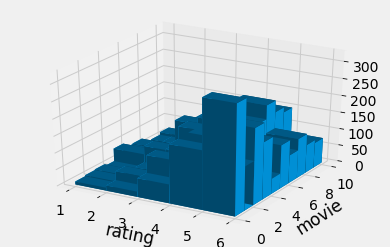

In [80]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
# Ratings is of 100000 rows, 3 cols (user id, movie id, rating)
# Get ids of 10 most rated movies
movie_ids = ratings[:,1]
counter = Counter(movie_ids)
# top_ten has format: id, # of 1s, # of 2s, # of 3s, # of 4s, # of 5s
top_ten = []
for i in counter.most_common(10):
    top_ten.append([i[0], 0, 0, 0, 0, 0])
top_ten=np.asarray(top_ten)
for i in range(100000):
    if ratings[i][1] in top_ten[:,0]:
        id_row = np.where(top_ten[:,0] == ratings[i][1])[0]
        rating = ratings[i][2]
        top_ten[id_row,rating] += 1

# Graph 10 most rated movies vs rating vs # of those ratings
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = [1,2,3,4,5]
y = top_ten[:,0]
x_data, y_data = np.meshgrid( [1,2,3,4,5],
                              [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
#
# Flatten out the arrays so that they may be passed to "ax.bar3d".
# Basically, ax.bar3d expects three one-dimensional arrays:
# x_data, y_data, z_data. The following call boils down to picking
# one entry from each array and plotting a bar to from
# (x_data[i], y_data[i], 0) to (x_data[i], y_data[i], z_data[i]).
#
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = top_ten[:,1:6].flatten()
ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),
          1, 1, z_data )
plt.xlabel("rating")
plt.ylabel("movie")
#
# Finally, display the plot.
#
plt.show()


In [81]:
horror = []
kids = []
for movie in movies:
    if movie[6] == 1:
        kids.append(movie[:2])
    if movie[13] == 1:
        horror.append(movie[:2])
for i in horror:
    print(i)

[17 'From Dusk Till Dawn (1996)']
[84 "Robert A. Heinlein's The Puppet Masters (1994)"]
[101 'Heavy Metal (1981)']
[123 'Frighteners, The (1996)']
[183 'Alien (1979)']
[184 'Army of Darkness (1993)']
[185 'Psycho (1960)']
[200 'Shining, The (1980)']
[201 'Evil Dead II (1987)']
[208 'Young Frankenstein (1974)']
[217 "Bram Stoker's Dracula (1992)"]
[219 'Nightmare on Elm Street, A (1984)']
[234 'Jaws (1975)']
[288 'Scream (1996)']
[307 "Devil's Advocate, The (1997)"]
[343 'Alien: Resurrection (1997)']
[351 'Prophecy II, The (1998)']
[353 'Deep Rising (1998)']
[379 'Tales From the Crypt Presents: Demon Knight (1995)']
[396 'Serial Mom (1994)']
[406 'Thinner (1996)']
[413 'Tales from the Crypt Presents: Bordello of Blood (1996)']
[424 'Children of the Corn: The Gathering (1996)']
[436 'American Werewolf in London, An (1981)']
[437 "Amityville 1992: It's About Time (1992)"]
[438 'Amityville 3-D (1983)']
[439 'Amityville: A New Generation (1993)']
[440 'Amityville II: The Possession (1982)']

#### Animation

[ 153  390  827 2112 2495 1486]
7310
[0.02093023 0.05335157 0.11313269 0.28891929 0.34131327 0.20328317]


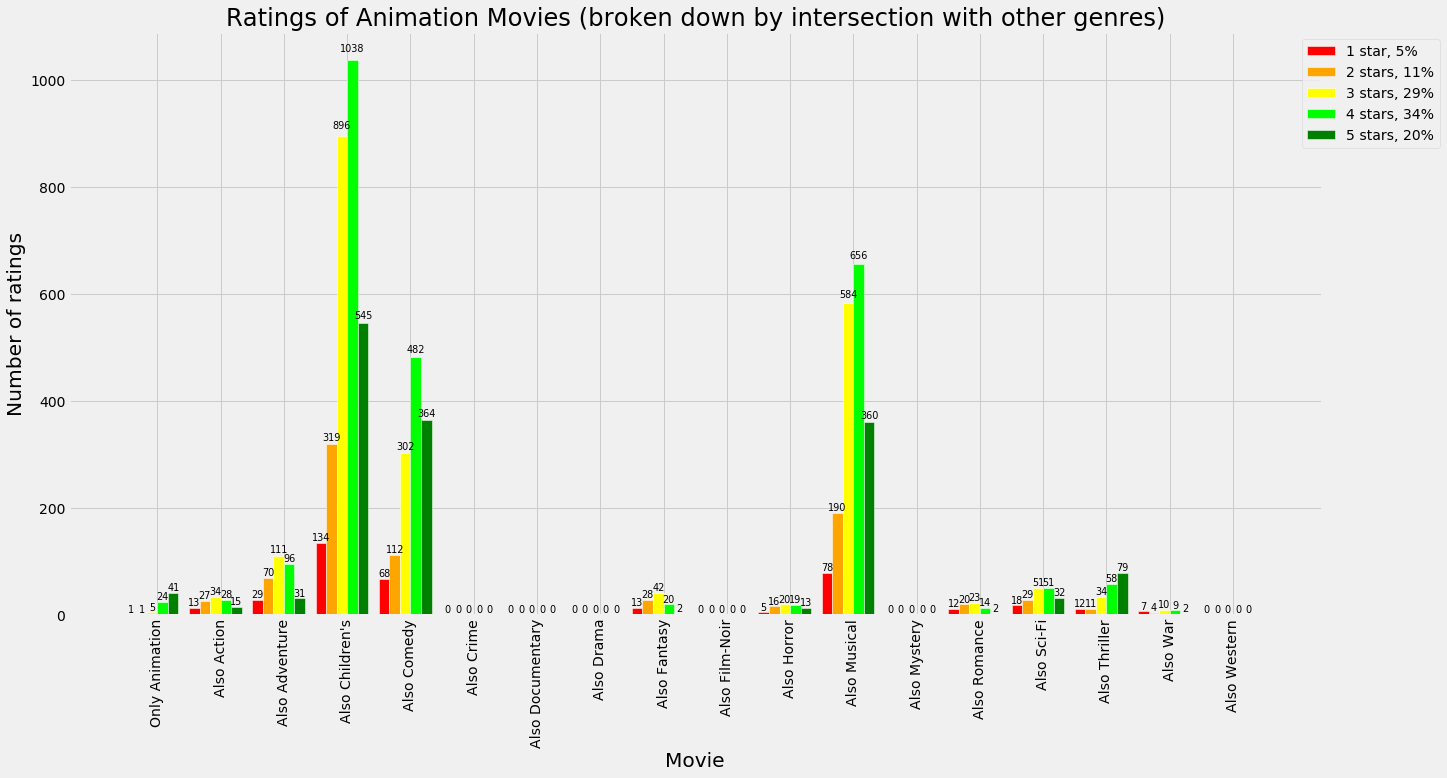

In [97]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
num_genres = 18

animation_movies = []
for i in range(len(movies)):
    if movies[i][5] == 1:
        animation_movies.append(movies[i])
animation_movies = np.asarray(animation_movies)
movie_ids = ratings[:,1]
# eighteen has format: genre, # of 1s, # of 2s, # of 3s, # of 4s, # of 5s
# 0: nothing, 1:'Action', 2:'Adventure', 3:'Children\'s', 
# 4:'Comedy', 5:'Crime', 6:'Documentary', 7:'Drama', 8:'Fantasy',
# 9:'Film-Noir', 10:'Horror', 11:'Musical', 12:'Mystery', 
# 13:'Romance', 14:'Sci-Fi', 15:'Thriller', 16:'War', 17:'Western'

# rating: user_id, movie_id, rating
eighteen = []
for i in range(18):
    eighteen.append([i, 0, 0, 0, 0, 0])
for rating in ratings:
    if (rating[1] in animation_movies[:,0]):
        index_of_movie_id = animation_movies[:,0].tolist().index(rating[1])
        has_other_genre = False
        for i in range(1, 3):
            if animation_movies[index_of_movie_id][i+2] == 1:
                eighteen[i][rating[2]] += 1
                has_other_genre = True
        for i in range(3, 18):
            if animation_movies[index_of_movie_id][i+3] == 1:
                eighteen[i][rating[2]] += 1
                has_other_genre = True

        # only animation
        if has_other_genre == False:
            eighteen[0][rating[2]] += 1
eighteen = np.array(eighteen)
#print(eighteen)

plt.figure(figsize=(20,10))
# y-axis in bold
#rc('font', weight='bold')

# Values of each group
bars1 = eighteen[:,1].tolist()
bars2 = eighteen[:,2].tolist()
bars3 = eighteen[:,3].tolist()
bars4 = eighteen[:,4].tolist()
bars5 = eighteen[:,5].tolist()
bars6 = np.zeros(num_genres).tolist()
# The position of the bars on the x-axis
r = np.arange(num_genres)
barWidth = 10
r=[barWidth*x for x in r]
#print(r)
 
# Names of genres
names = ["Only Animation", 'Also Action', 'Also Adventure', 'Also Children\'s', 
        'Also Comedy', 'Also Crime', 'Also Documentary', 'Also Drama', 'Also Fantasy',
        'Also Film-Noir', 'Also Horror', 'Also Musical', 'Also Mystery', 
        'Also Romance', 'Also Sci-Fi', 'Also Thriller', 'Also War', 'Also Western']
#[str(i+1)+": "+movies[np.where(movies[:,0]==top_ten[i, 0])[0],1][0] for i in range(num_genres)]


# 1 star bars
rating1=plt.bar([6*x for x in r],
        bars1, 
        color='red', 
        edgecolor='white', 
        width=barWidth)
# 2 star bars
rating2=plt.bar([6*x+1*barWidth for x in r], bars2, 
        color='orange', 
        edgecolor='white', 
        width=barWidth)
# 3 star bars
rating3=plt.bar([6*x+2*barWidth for x in r], bars3, 
        color='yellow', 
        edgecolor='white', 
        width=barWidth)
# 4 star bars
rating4=plt.bar([6*x+3*barWidth for x in r], bars4, 
        color='lime', 
        edgecolor='white', 
        width=barWidth)
# 5 star bars
rating5=plt.bar([6*x+4*barWidth for x in r], bars5, 
        color='green', 
        edgecolor='white', 
        width=barWidth)
# Blank bars
blank=plt.bar([6*x+5*barWidth for x in r], bars6, 
        color='white', 
        edgecolor='white', 
        width=barWidth)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 
                 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom',
                fontsize="x-small")

autolabel(rating1)
autolabel(rating2)
autolabel(rating3)
autolabel(rating4)
autolabel(rating5)

# Custom X axis
plt.xticks([6*x+2.5*barWidth for x in r], names,rotation='vertical')
plt.xlabel("Movie", fontsize="x-large")
plt.ylabel("Number of ratings", fontsize="x-large")
plt.title("Ratings of Animation Movies (broken down by intersection with other genres)", fontsize="xx-large")
plt.legend((rating1[0],rating2[0],rating3[0],rating4[0],rating5[0]),
           ("1 star, 5%", "2 stars, 11%", "3 stars, 29%", "4 stars, 34%", "5 stars, 20%"),
           bbox_to_anchor=(1.1, 1))
 
# Show and save graphic
plt.show()
plt.savefig("animation_movie_ratings.png")

sums = np.sum(eighteen, axis = 0)
print(sums)
total = np.sum(sums[1:])
print(total)
pcnt = sums/total
print (pcnt)